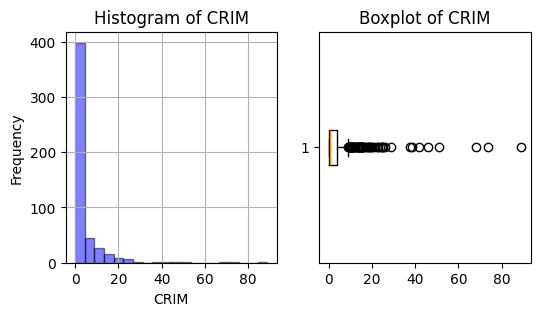

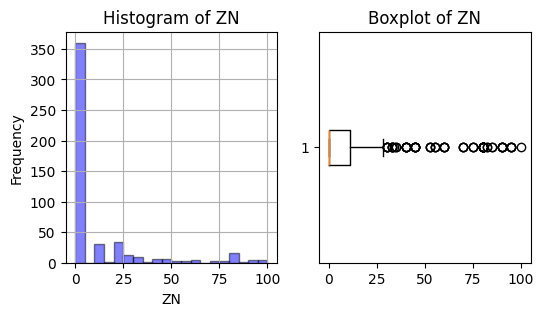

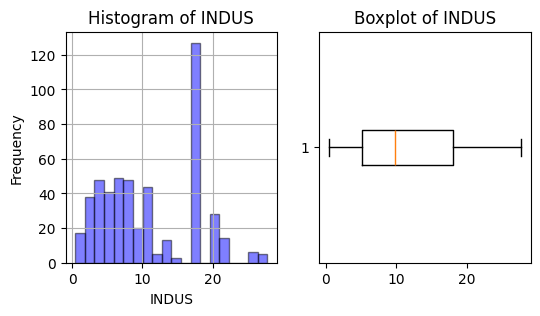

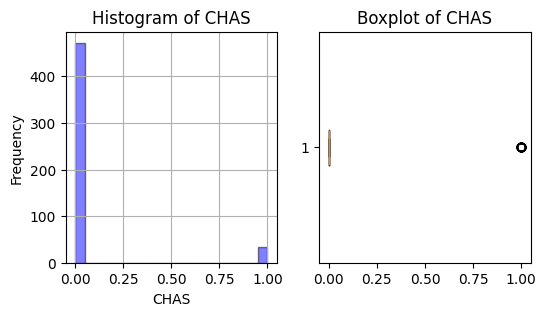

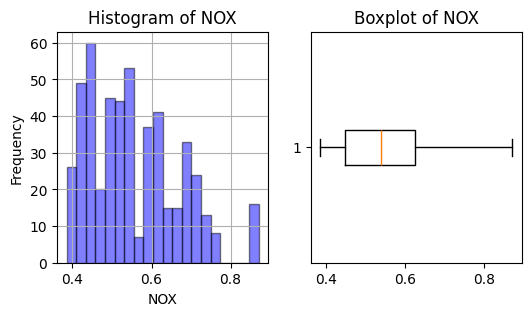

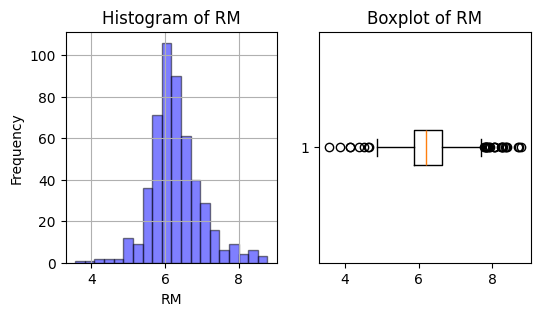

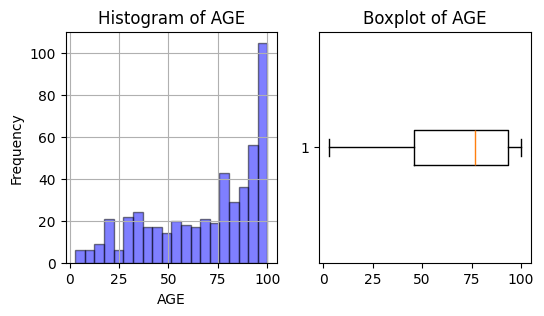

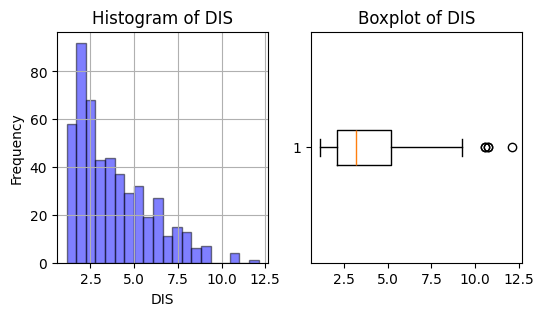

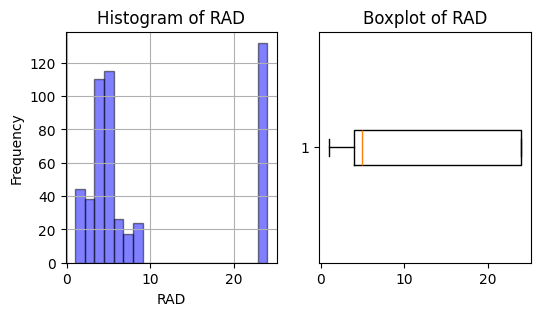

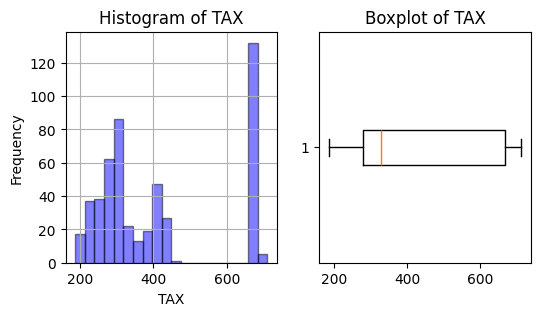

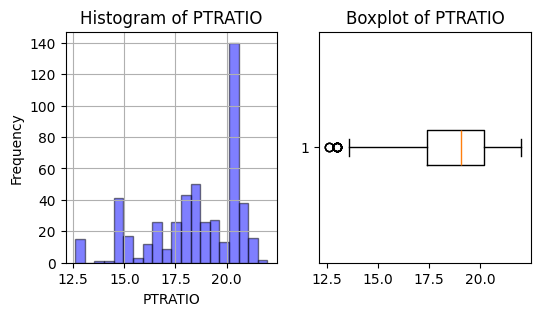

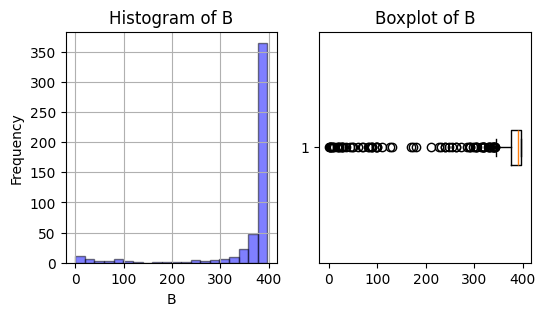

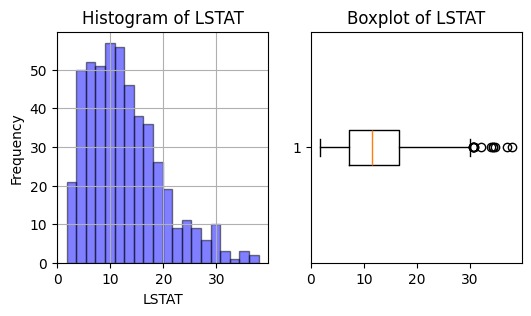

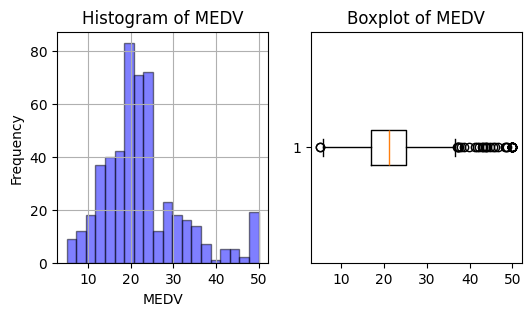

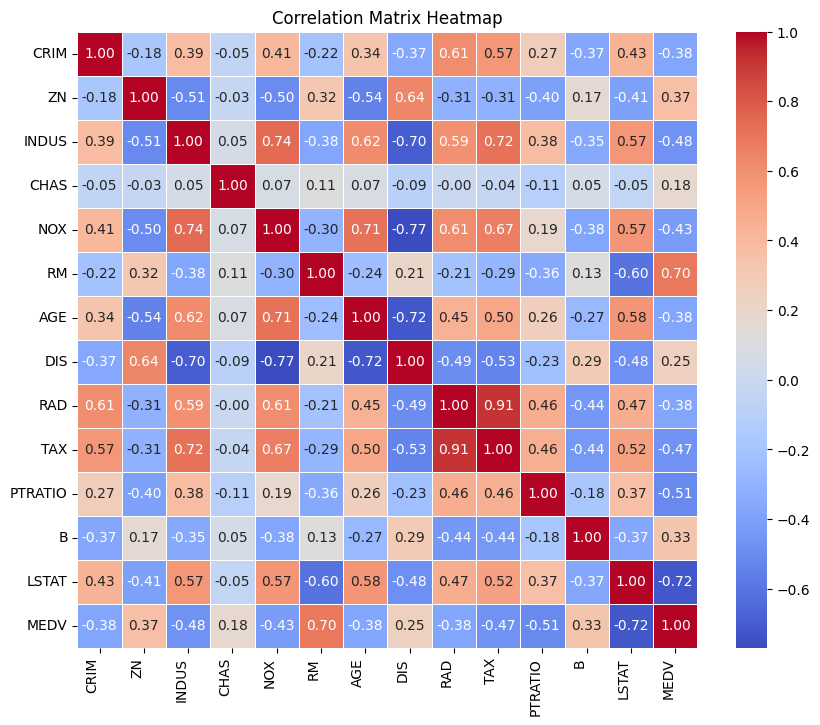

Mean Squared Error: 34.75
Root Mean Squared Error: 5.89
R-squared: 0.57


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv("/content/Boston housing dataset (1).csv")  # Replace with your file path

# Fill missing values
df = data.copy()
df['CRIM'].fillna(df['CRIM'].mean(), inplace=True)
df['ZN'].fillna(df['ZN'].mean(), inplace=True)
df['CHAS'].fillna(df['CHAS'].mode()[0], inplace=True)
df['INDUS'].fillna(df['INDUS'].mean(), inplace=True)
df['AGE'].fillna(df['AGE'].median(), inplace=True)
df['LSTAT'].fillna(df['LSTAT'].median(), inplace=True)
df['CHAS'] = df['CHAS'].astype(int)
for i in df.columns:
  plt.figure(figsize=(6,3))
  plt.subplot(1, 2, 1)
  df[i].hist(bins=20, alpha=0.5, color='b',edgecolor='black')
  plt.title(f'Histogram of {i}')
  plt.xlabel(i)
  plt.ylabel('Frequency')
  plt.subplot(1, 2, 2)
  plt.boxplot(df[i], vert=False)
  plt.title(f'Boxplot of {i}')
  plt.show()

corr = df.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.title("Correlation Matrix Heatmap")
plt.show()
# Scale the data
X = df.drop("MEDV", axis=1)
y = df["MEDV"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")
